In [102]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [103]:
#converting csv file into data frame. Assume the source file is in raw_data folder.
city_df = pd.read_csv('raw_data/city_data.csv')
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [104]:
#grouping the df by city, as Port James has 2 entries in source file. suburban-13 and suburban-5
city_df = city_df.groupby(['city','type'] ,as_index = False)['driver_count'].sum()
city_df.head()

,city,type,driver_count
0,Alvarezhaven,Urban,21
1,Alyssaberg,Urban,67
2,Anitamouth,Suburban,16
3,Antoniomouth,Urban,21
4,Aprilchester,Urban,49


In [105]:
#coverting csv file 2 into dataframe, assuming file is located in raw_data folder
ride_df = pd.read_csv('raw_data/ride_data.csv')
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [106]:
#merging above 2 df to carry out further calculations
cityride = pd.merge(ride_df, city_df, how='inner', on=('city')).rename(columns={'type': 'city_type'})[['city','city_type','driver_count','fare','date','ride_id']]
cityride.head()

,city,city_type,driver_count,fare,date,ride_id
0,Sarabury,Urban,46,38.35,2016-01-16 13:49:27,5403689035038
1,Sarabury,Urban,46,21.76,2016-07-23 07:42:44,7546681945283
2,Sarabury,Urban,46,38.03,2016-04-02 04:32:25,4932495851866
3,Sarabury,Urban,46,26.82,2016-06-23 05:03:41,6711035373406
4,Sarabury,Urban,46,30.30,2016-09-30 12:48:34,6388737278232


In [107]:
#getting city_types from dataframe
cities = cityride['city_type'].unique()
cities

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [108]:
#calculating fare by city type from dataframe
fare = cityride.groupby('city_type', sort=False).sum()['fare']
fare

city_type
Urban       40078.34
Suburban    19317.88
Rural        4255.09
Name: fare, dtype: float64

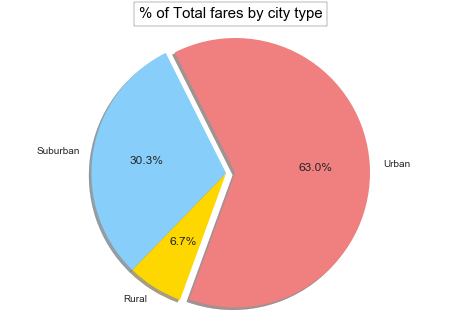

In [123]:
#generating pie chart for Total fare by city type

#defining different plot elements
labels = cities
colors = ['lightcoral','lightskyblue','Gold']
explode = (0.075,0,0)
plt.title('% of Total fares by city type', color = 'black',size = 15,bbox={'facecolor':'1','pad':5})

#pie plot 
byfare = plt.pie(fare, explode=explode, labels=labels,labeldistance = 1.1,pctdistance = 0.6,radius = 1.1, colors=colors ,autopct="%.1f%%",
        shadow=True, startangle=250)
plt.axis("equal")
#plt.tight_layout
#plt.legend(cities, loc = 'center right')


plt.savefig("%Tfare_by_City_Type_pie.png")
plt.show(byfare)

In [110]:
#count rides by city type
rides = cityride.groupby('city_type', sort=False).count()['ride_id'] 
rides


city_type
Urban       1625
Suburban     625
Rural        125
Name: ride_id, dtype: int64

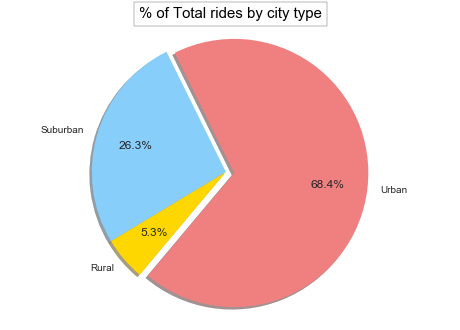

In [111]:
#creating pie chart for Total rides by city type
plt.title('% of Total rides by city type', size = 15,color = 'black',bbox={'facecolor': '1','pad':5})

#plotting pie chart
byride = plt.pie(rides, labels=labels, colors=colors,radius = 1.2,explode=explode, autopct = "%.1f%%",
pctdistance = 0.7,shadow = True,startangle = 230)

plt.axis("equal")

plt.savefig('%Trides_city_type.png')
plt.show(byride)

In [112]:
#calculating total driver counts by city type
agg = cityride.groupby(['city_type','city'], as_index = False, sort=False)['driver_count'].mean() 
drivers = agg.groupby('city_type', sort=False)['driver_count'].sum()
drivers


city_type
Urban       2607
Suburban     638
Rural        104
Name: driver_count, dtype: int64

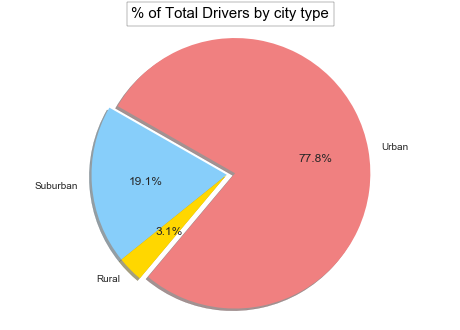

In [113]:
#Creating pie chart for total drivers by city type
plt.title("% of Total Drivers by city type",size = 15, color = 'black',bbox={'facecolor': '1', 'pad': 5})

#plotting the pie chart
bydrivers = plt.pie(drivers, labels=labels, explode=explode,radius=1.2, colors=colors,shadow=True,
autopct = "%.1f%%",startangle = 230)
plt.axis('equal')
plt.savefig('%Tdrivers_city_type.png')
plt.show(bydrivers)


In [114]:
#calculating total rides per city for bubble plot
total_rides = cityride.groupby(['city','city_type'], as_index = False)['ride_id'].count()
total_rides.head()

,city,city_type,ride_id
0,Alvarezhaven,Urban,31
1,Alyssaberg,Urban,26
2,Anitamouth,Suburban,9
3,Antoniomouth,Urban,22
4,Aprilchester,Urban,19


In [115]:
#calculating average fare per city for bubble plot
avg_fare = cityride.groupby(['city', 'city_type'], as_index=False)['fare'].mean()
avg_fare.head()

,city,city_type,fare
0,Alvarezhaven,Urban,23.928710
1,Alyssaberg,Urban,20.609615
2,Anitamouth,Suburban,37.315556
3,Antoniomouth,Urban,23.625000
4,Aprilchester,Urban,21.981579


In [116]:
#calculating total drivers per city for bubble plot
total_drivers = cityride.groupby(['city','city_type'], as_index = False)['driver_count'].mean()
total_drivers.head()

,city,city_type,driver_count
0,Alvarezhaven,Urban,21
1,Alyssaberg,Urban,67
2,Anitamouth,Suburban,16
3,Antoniomouth,Urban,21
4,Aprilchester,Urban,49


In [119]:
#merging dataframes to plot bubble plot

bubble = pd.merge(pd.merge(total_rides, avg_fare,on=('city','city_type')),total_drivers, on=('city','city_type')).rename(columns={'ride_id':'ride_count','fare':'avg_fare'})
bubble.head()


,city,city_type,ride_count,avg_fare,driver_count
0,Alvarezhaven,Urban,31,23.928710,21
1,Alyssaberg,Urban,26,20.609615,67
2,Anitamouth,Suburban,9,37.315556,16
3,Antoniomouth,Urban,22,23.625000,21
4,Aprilchester,Urban,19,21.981579,49


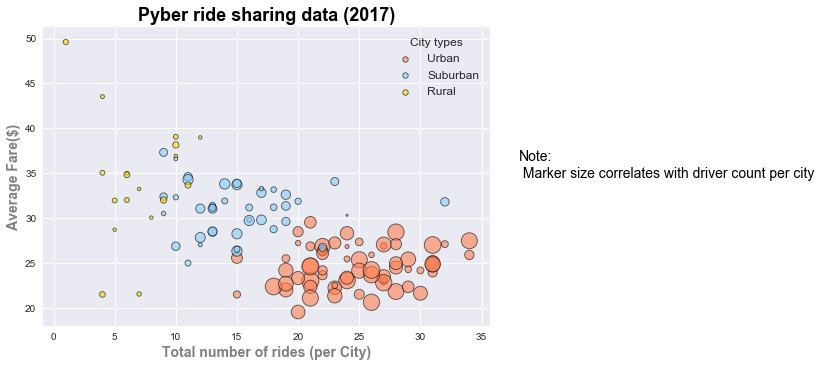

In [121]:
# Bubble plot

#create figure
fig = plt.figure()

#importing seaborn for plot style

import seaborn as sns
sns.set(style = 'darkgrid', color_codes=True)

#setting size of marker for urban city type based on driver count
urban = bubble['driver_count'][bubble['city_type']=='Urban']
u = [v*4 for i,v in urban.items()]

#plotting scatter for urban cities

plt.scatter(bubble['ride_count'][bubble['city_type']=='Urban'],
bubble['avg_fare'][bubble['city_type']=='Urban'], s=u ,marker='o', linewidth=0.9, edgecolor='black', color = 'coral',
alpha=0.6,label='Urban')


#setting marker size for suburban cities based on driver count
suburban = bubble['driver_count'][bubble['city_type']=='Suburban']
s = [v*4 for i,v in suburban.items()]

#creating scatter plot where city-type = suburban

plt.scatter(bubble['ride_count'][bubble['city_type']=='Suburban'],
bubble['avg_fare'][bubble['city_type']=='Suburban'],s=s,marker='o',linewidth=0.9,edgecolor='black', color = 'lightskyblue',
alpha=0.6,label='Suburban')

#setting marker size for Rural cities based on driver count
rural = bubble['driver_count'][bubble['city_type']=='Rural']
r = [v*4 for i,v in rural.items()]

#creating scatter plot where city-type = Rural

plt.scatter(bubble['ride_count'][bubble['city_type']=='Rural'],
bubble['avg_fare'][bubble['city_type']=='Rural'],s=r,marker='o', linewidth=0.9,edgecolor='black', color = 'gold',alpha=0.6,label='Rural')

#setting up plot elements - labels, Title, text, legends

plt.xlabel("Total number of rides (per City)", color = 'grey', weight = 'bold', fontsize = 14)
plt.ylabel("Average Fare($)", color = 'grey', weight = 'bold', fontsize = 14)

plt.title("Pyber ride sharing data (2017)", color = 'black', weight = 'bold', fontsize = 18)

plt.figtext(0.95,0.5,'Note:\n Marker size correlates with driver count per city', color = 'black', fontsize=14)
lgnd = plt.legend(cities, title='City types', loc =1 , shadow = True, fontsize = 12)

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.savefig("bubble.png")
plt.show()

# Findings from the data:
1. Urban cities have maximum share of the drivers (approx 78%) and fare (appprox 63%)
2. Rural cities have least number of drivers(approx 3%) yet holds approx 6% of the fare. It means it pays more to be a driver in rural cities - approx 40 dollars per driver.
3. Urban cities seems to be close to saturation level, more drivers should be employed in rural cities to increase earnings.